# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

**After this lesson students will be able to**:
- apply regularization to `keras` neural networks

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [4]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=11, stratify=y)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train).astype(np.int32)
X_test_s = ss.transform(X_test).astype(np.int32)

In [6]:
model = Sequential()

n_input = X_train_s.shape[1]

model.add(Dense(n_input, activation='relu'))
model.add(Dense(1))

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')

By the way, here is a helpful blog post that goes carefully through a list of similarly-named different activation functions and loss functions: https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [8]:
history = model.fit(X_train_s, np.array(y_train),
                    validation_data=(X_test_s, np.array(y_test)),
                   epochs=30, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/30
4872/4872 [==============================] - 1s 156us/step - loss: 26.4716 - val_loss: 20.4544
Epoch 2/30
4872/4872 [==============================] - 0s 54us/step - loss: 15.5952 - val_loss: 11.9586
Epoch 3/30
4872/4872 [==============================] - 0s 52us/step - loss: 8.6224 - val_loss: 6.1012
Epoch 4/30
4872/4872 [==============================] - 0s 51us/step - loss: 4.3455 - val_loss: 3.0242
Epoch 5/30
4872/4872 [==============================] - 0s 53us/step - loss: 2.4244 - val_loss: 1.9715
Epoch 6/30
4872/4872 [==============================] - 0s 52us/step - loss: 1.7801 - val_loss: 1.5623
Epoch 7/30
4872/4872 [==============================] - 0s 52us/step - loss: 1.4616 - val_loss: 1.3125
Epoch 8/30
4872/4872 [==============================] - 0s 52us/step - loss: 1.2367 - val_loss: 1.1341
Epoch 9/30
4872/4872 [==============================] - 0s 52us/step - loss: 1.0673 - val_loss: 1.0008
Epoch 10/30
4872/487

In [10]:
for layer in model.layers:
    print(layer.get_weights())

[array([[-1.12599246e-01, -1.74077660e-01,  2.84379929e-01,
         5.52581362e-02, -2.54251510e-01, -3.35960716e-01,
         3.58620375e-01,  3.44989538e-01, -1.21785700e-01,
        -8.07107762e-02, -3.23474735e-01,  3.76110911e-01],
       [ 2.94308841e-01,  4.12444562e-01, -1.76895306e-01,
         3.21333349e-01, -7.61310995e-01,  4.01244074e-01,
        -5.86226135e-02, -2.07400799e-01, -2.94445246e-01,
         2.45363057e-01,  1.84001178e-01,  3.25376727e-02],
       [ 2.50064701e-01, -3.68097201e-02,  3.40418994e-01,
        -1.77289948e-01,  5.82485944e-02, -1.57122970e-01,
         9.39202160e-02,  3.12114656e-02, -1.41905695e-01,
        -2.44421542e-01,  4.24759716e-01, -3.17599446e-01],
       [ 1.05016030e-01, -2.59168833e-01, -6.01588227e-02,
         1.96789026e-01, -6.97315335e-02,  1.35341719e-01,
         3.28703076e-01,  3.12912375e-01, -3.57852578e-01,
        -3.88794482e-01, -4.12048735e-02,  4.91240650e-01],
       [ 5.80800712e-01, -6.66700527e-02,  1.348986

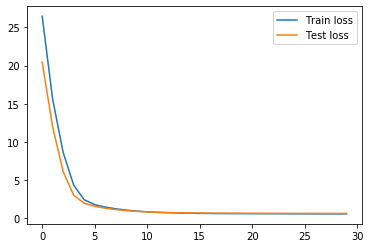

In [11]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

In [13]:
# error across all data points
sum(abs(np.array(model.predict(X_test_s).T) - np.array(y_test))[0])

1006.8274645805359

## Adding Regularization

Here's a helpful review article on regularization techniques: https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [14]:
from keras import regularizers

In [15]:
X_train.shape

(4872, 12)

In [16]:
model_r = Sequential()

n_input = X_train_s.shape[1]

model_r.add(Dense(n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(1,
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(optimizer='adam', loss='mean_squared_error')

history_r = model_r.fit(X_train_s, np.array(y_train),
                        validation_data=(X_test_s, np.array(y_test)),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 172us/step - loss: 34.4131 - val_loss: 28.7025
Epoch 2/42
4872/4872 [==============================] - 0s 57us/step - loss: 23.3219 - val_loss: 18.1363
Epoch 3/42
4872/4872 [==============================] - 0s 56us/step - loss: 13.6327 - val_loss: 9.8119
Epoch 4/42
4872/4872 [==============================] - 0s 58us/step - loss: 7.0286 - val_loss: 5.1048
Epoch 5/42
4872/4872 [==============================] - 0s 58us/step - loss: 4.0268 - val_loss: 3.3929
Epoch 6/42
4872/4872 [==============================] - 0s 56us/step - loss: 2.8949 - val_loss: 2.5816
Epoch 7/42
4872/4872 [==============================] - 0s 56us/step - loss: 2.2662 - val_loss: 2.0527
Epoch 8/42
4872/4872 [==============================] - 0s 59us/step - loss: 1.8339 - val_loss: 1.6798
Epoch 9/42
4872/4872 [==============================] - 0s 58us/step - loss: 1.5324 - val_loss: 1.4220
Epoch 10/42
4872/48

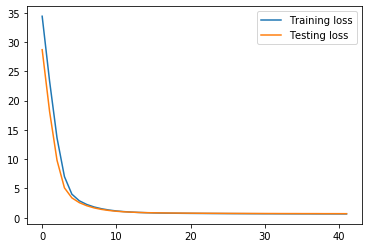

In [17]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

#### Examining Our Predictions

In [23]:
# preds for x test
model_r.predict(X_test_s[:10]).round(2)

array([[5.46],
       [5.56],
       [4.55],
       [5.78],
       [4.78],
       [5.83],
       [5.89],
       [4.78],
       [5.58],
       [5.8 ]], dtype=float32)

In [24]:
y_test[:10]

930     5
143     5
1037    5
4212    5
1032    5
5236    7
4651    7
4       5
1091    6
1536    6
Name: quality, dtype: int64

In [25]:
model_r.predict(X_test_s).T

array([[5.4638777, 5.5574923, 4.5481114, ..., 6.0093517, 5.0895367,
        6.1268616]], dtype=float32)

In [26]:
(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0]

array([ 0.46387768,  0.55749226, -0.45188856, ...,  1.00935173,
        0.08953667,  0.12686157])

In [28]:
# get error across datapoints
sum(abs(np.array(model_r.predict(X_test_s).T) - np.array(y_test))[0])

994.7032942771912

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Yes it is a good idea! We don't want the network to get overly trained on certain paths, so we are going to make some paths unavailable.

Was this sort of regularization available to us before? Why (not)?

In [31]:
from keras.layers import Dropout

In [32]:
model_d = Sequential()

n_input = X_train_s.shape[1]

model_d.add(Dense(n_input, activation='relu'))
# droupout will apply to this ^^ hidden layer (whichever layer the dropout was added after)
model_d.add(Dropout(0.2))
model_d.add(Dense(1))

model_d.compile(optimizer='adam', loss='mean_squared_error')

history_d = model_d.fit(X_train_s, np.array(y_train),
                        validation_data=(X_test_s, np.array(y_test)),
                        epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 195us/step - loss: 23.4250 - val_loss: 17.5594
Epoch 2/42
4872/4872 [==============================] - 0s 67us/step - loss: 13.8619 - val_loss: 9.1266
Epoch 3/42
4872/4872 [==============================] - 0s 69us/step - loss: 7.7128 - val_loss: 4.6726
Epoch 4/42
4872/4872 [==============================] - 0s 67us/step - loss: 5.2941 - val_loss: 2.9883
Epoch 5/42
4872/4872 [==============================] - 0s 65us/step - loss: 4.3863 - val_loss: 2.3263
Epoch 6/42
4872/4872 [==============================] - 0s 66us/step - loss: 3.5602 - val_loss: 1.9023
Epoch 7/42
4872/4872 [==============================] - 0s 66us/step - loss: 3.3025 - val_loss: 1.6391
Epoch 8/42
4872/4872 [==============================] - 0s 69us/step - loss: 3.0213 - val_loss: 1.3919
Epoch 9/42
4872/4872 [==============================] - 0s 72us/step - loss: 2.6248 - val_loss: 1.1923
Epoch 10/42
4872/4872

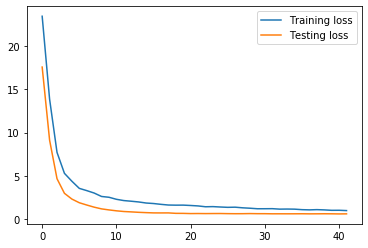

In [33]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [34]:
sum(abs(np.array(model_d.predict(X_test_s).T) - np.array(y_test))[0])

1004.6187953948975

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [35]:
from keras.callbacks import EarlyStopping

In [36]:
model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(1))

model_es.compile(optimizer='adam', loss='mean_squared_error')
                        # look at val_loss    
                        # if it stops going down more than (patience number of times), stop running epochs 
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, np.array(y_train),
                          validation_data=(X_test_s, np.array(y_test)),
                         epochs=40, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/40
4872/4872 [==============================] - 1s 150us/step - loss: 29.8257 - val_loss: 22.6168
Epoch 2/40
4872/4872 [==============================] - 0s 52us/step - loss: 16.7718 - val_loss: 11.6570
Epoch 3/40
4872/4872 [==============================] - 0s 53us/step - loss: 8.0205 - val_loss: 5.2263
Epoch 4/40
4872/4872 [==============================] - 0s 56us/step - loss: 3.8455 - val_loss: 2.9321
Epoch 5/40
4872/4872 [==============================] - 0s 55us/step - loss: 2.4987 - val_loss: 2.2066
Epoch 6/40
4872/4872 [==============================] - 0s 56us/step - loss: 1.9421 - val_loss: 1.7951
Epoch 7/40
4872/4872 [==============================] - 0s 54us/step - loss: 1.5932 - val_loss: 1.5019
Epoch 8/40
4872/4872 [==============================] - 0s 60us/step - loss: 1.3438 - val_loss: 1.2789
Epoch 9/40
4872/4872 [==============================] - 0s 55us/step - loss: 1.1527 - val_loss: 1.1063
Epoch 10/40
4872/487

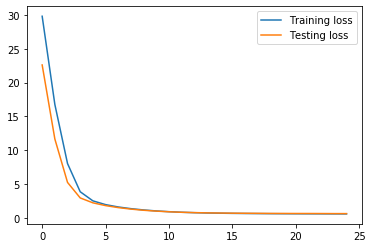

In [37]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();

In [38]:
sum(abs(np.array(model_es.predict(X_test_s).T) - np.array(y_test))[0])

989.1138563156128

## Exercise

Build your own network *with some sort of regularization built in* to predict digits using sklearn's `load_digits` dataset!

The imports you need are in the next cell.

Here are a couple hints and leading questions:

1. You'll need to use `to_categorical()` on your target. (What does this function do?)
2. What should your output layer look like? How many neurons should it have and what should your activation function be there?
3. When we compile this network, what loss function should we use?
4. When we compile this network, we can add a list of metrics, such as `['acc']`.

In [40]:
from sklearn.datasets import load_digits
from keras.utils import to_categorical

In [42]:
data = load_digits()
print(data.data)
print(data.target)
print(data.DESCR)
X = data.data
y = data.target

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted for

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)
y_train

array([3, 0, 9, ..., 2, 8, 4])

In [55]:
model = Sequential()

n_input = X_train_s.shape[1]

model.add(Dense(n_input, input_dim=n_input, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')
callbacks_list = [early_stop]

history = model.fit(X_train, np.array(y_train_c),
                        validation_data=(X_test_s, np.array(y_test_c)),
                        epochs=30, batch_size=None, callbacks=callbacks_list)

ValueError: Error when checking input: expected dense_21_input to have shape (12,) but got array with shape (64,)

In [ ]:
plt.matshow(data.images[0]);